In [ ]:
!pip install -U imbalanced-learn
!pip install -U imbalanced-learn
!pip install kaggle
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

import bokeh as bk
import copy

In [ ]:
import os
os.environ['Kaggle_Config_Dir'] = '/content'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies -q

Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
License(s): ODC Attribution License (ODC-By)


In [ ]:
!unzip -q tmdb-movies-dataset-2023-930k-movies.zip

# **1. DATA PREPROCESSING**


In [ ]:
movies_df = pd.read_csv("TMDB_movie_dataset_v11.csv")
movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
print("The total number of rows are: ",movies_df.shape[0])
print("The total number of columns are: ", movies_df.shape[1])

The total number of rows are:  1031806
The total number of columns are:  24


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031806 entries, 0 to 1031805
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1031806 non-null  int64  
 1   title                 1031794 non-null  object 
 2   vote_average          1031806 non-null  float64
 3   vote_count            1031806 non-null  int64  
 4   status                1031806 non-null  object 
 5   release_date          901588 non-null   object 
 6   revenue               1031806 non-null  int64  
 7   runtime               1031806 non-null  int64  
 8   adult                 1031806 non-null  bool   
 9   backdrop_path         287088 non-null   object 
 10  budget                1031806 non-null  int64  
 11  homepage              111665 non-null   object 
 12  imdb_id               578974 non-null   object 
 13  original_language     1031806 non-null  object 
 14  original_title        1031794 non-

In [ ]:
# Convert the 'genres' column to string type
movies_df['genres'] = movies_df['genres'].astype(str)
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031806 entries, 0 to 1031805
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1031806 non-null  int64  
 1   title                 1031794 non-null  object 
 2   vote_average          1031806 non-null  float64
 3   vote_count            1031806 non-null  int64  
 4   status                1031806 non-null  object 
 5   release_date          901588 non-null   object 
 6   revenue               1031806 non-null  int64  
 7   runtime               1031806 non-null  int64  
 8   adult                 1031806 non-null  bool   
 9   backdrop_path         287088 non-null   object 
 10  budget                1031806 non-null  int64  
 11  homepage              111665 non-null   object 
 12  imdb_id               578974 non-null   object 
 13  original_language     1031806 non-null  object 
 14  original_title        1031794 non-

In [ ]:
# Checking for number of null values in the columns
print("Columns with null values:")
movies_df.isnull().sum()


Columns with null values:


id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            130218
revenue                      0
runtime                      0
adult                        0
backdrop_path           744718
budget                       0
homepage                920141
imdb_id                 452832
original_language            0
original_title              12
overview                190308
popularity                   0
poster_path             295385
tagline                 884416
genres                       0
production_companies    546930
production_countries    428131
spoken_languages        415747
keywords                737477
dtype: int64

In [ ]:
# Check for any other columns with a high percentage of missing values
missing_percentage = movies_df.isnull().mean() * 100
high_missing_percentage_columns = missing_percentage[missing_percentage > 50].index.tolist()

# Display columns with a high percentage of missing values
print('Columns with more than 50% missing values:')
print(high_missing_percentage_columns)

Columns with more than 50% missing values:
['backdrop_path', 'homepage', 'tagline', 'production_companies', 'keywords']


In [ ]:
# Check for duplicate rows
duplicate_rows = movies_df[movies_df.duplicated()]
print(duplicate_rows)

# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)

duplicate_rows = movies_df[movies_df.duplicated()]
print("The number of repreated rows after removal: ",duplicate_rows)

             id                            title  vote_average  vote_count  \
297802  1236071                          Semetua           9.0           1   
312239  1199990                       The Undead          10.0           1   
317693  1226029  Dima Koval: Stand-up from Vegas          10.0           1   
318853  1220680                    Mr. Kobayashi          10.0           1   
326045  1260267                 My First Porno 6           6.0           1   
...         ...                              ...           ...         ...   
574072  1223689           F Sekulách okouo Vánoc           0.0           0   
639942  1268961              Good Things To Life           0.0           0   
639960  1268961              Good Things To Life           0.0           0   
641545  1270007                            Birds           0.0           0   
663842  1271689                    Road Warriors           0.0           0   

          status release_date  revenue  runtime  adult  \
29780

  0%|          | 0/6 [00:00<?, ?it/s]

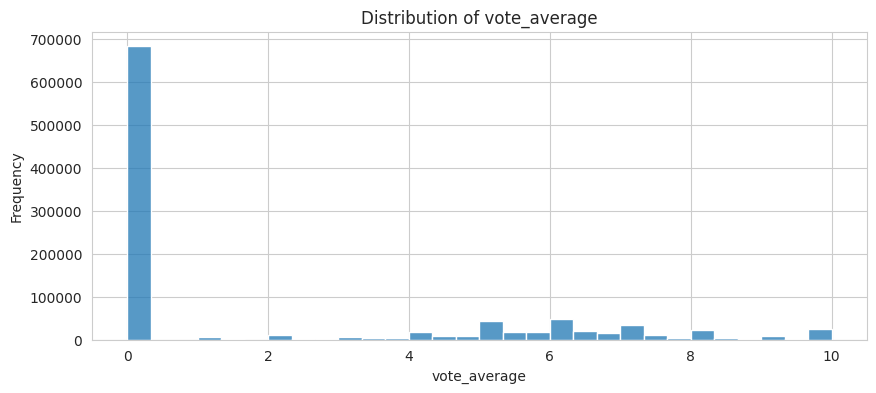

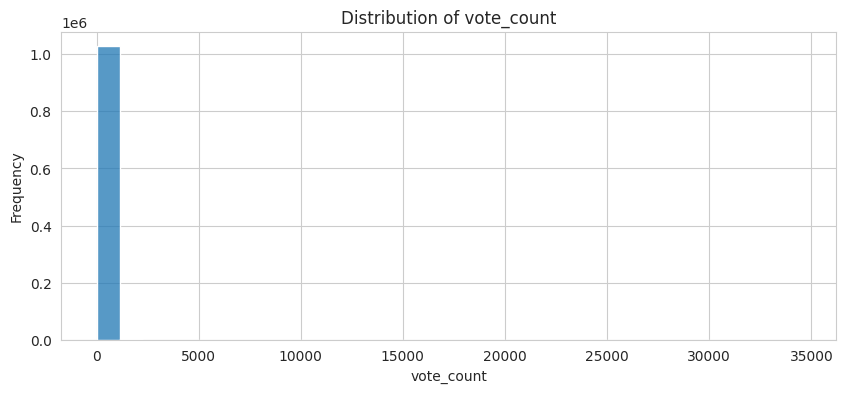

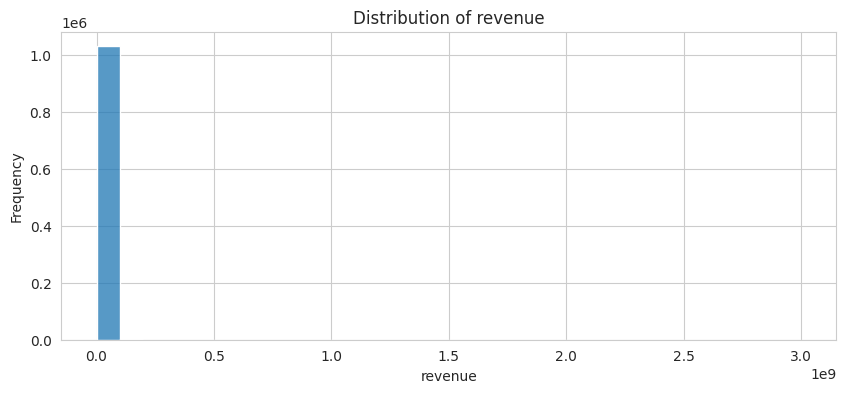

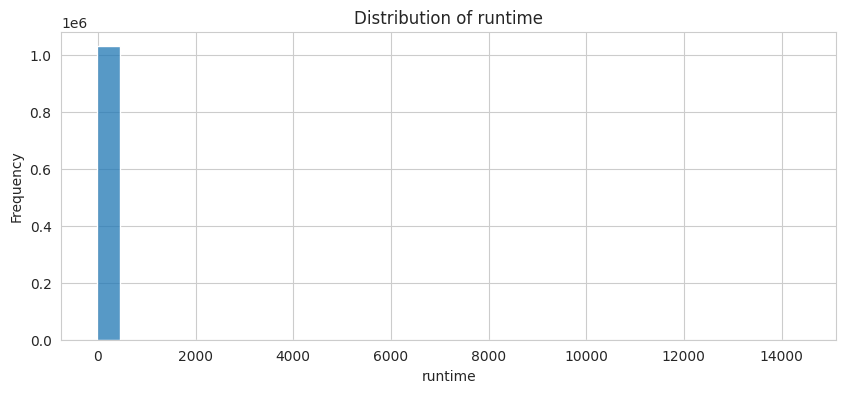

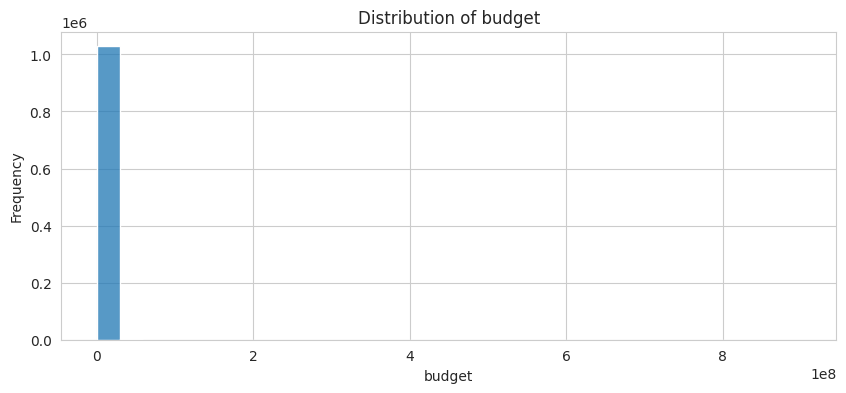

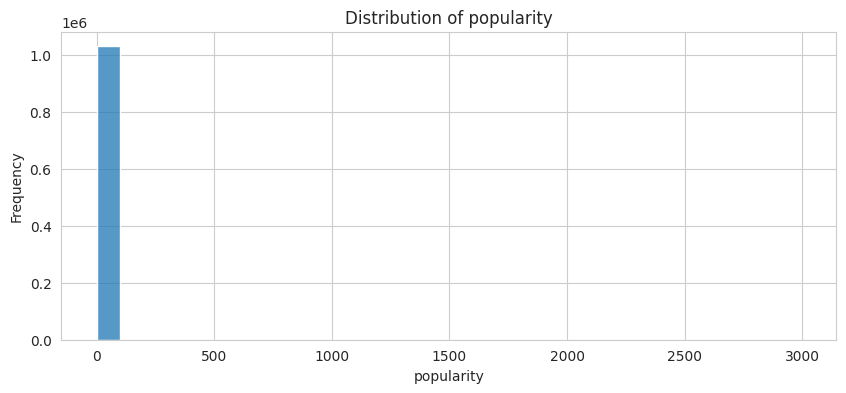

In [ ]:
## Plotting the distributions for all the numerical coloumns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Identify numerical columns (excluding ID-like columns which are not meaningful for distribution)
numerical_cols = movies_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if not col.endswith(('id', 'id_w_time', 'id_big'))]

# Plotting distributions for all numerical features
for col in tqdm(numerical_cols):
    plt.figure(figsize=(10, 4))
    sns.histplot(movies_df[col], kde=False, bins=30)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

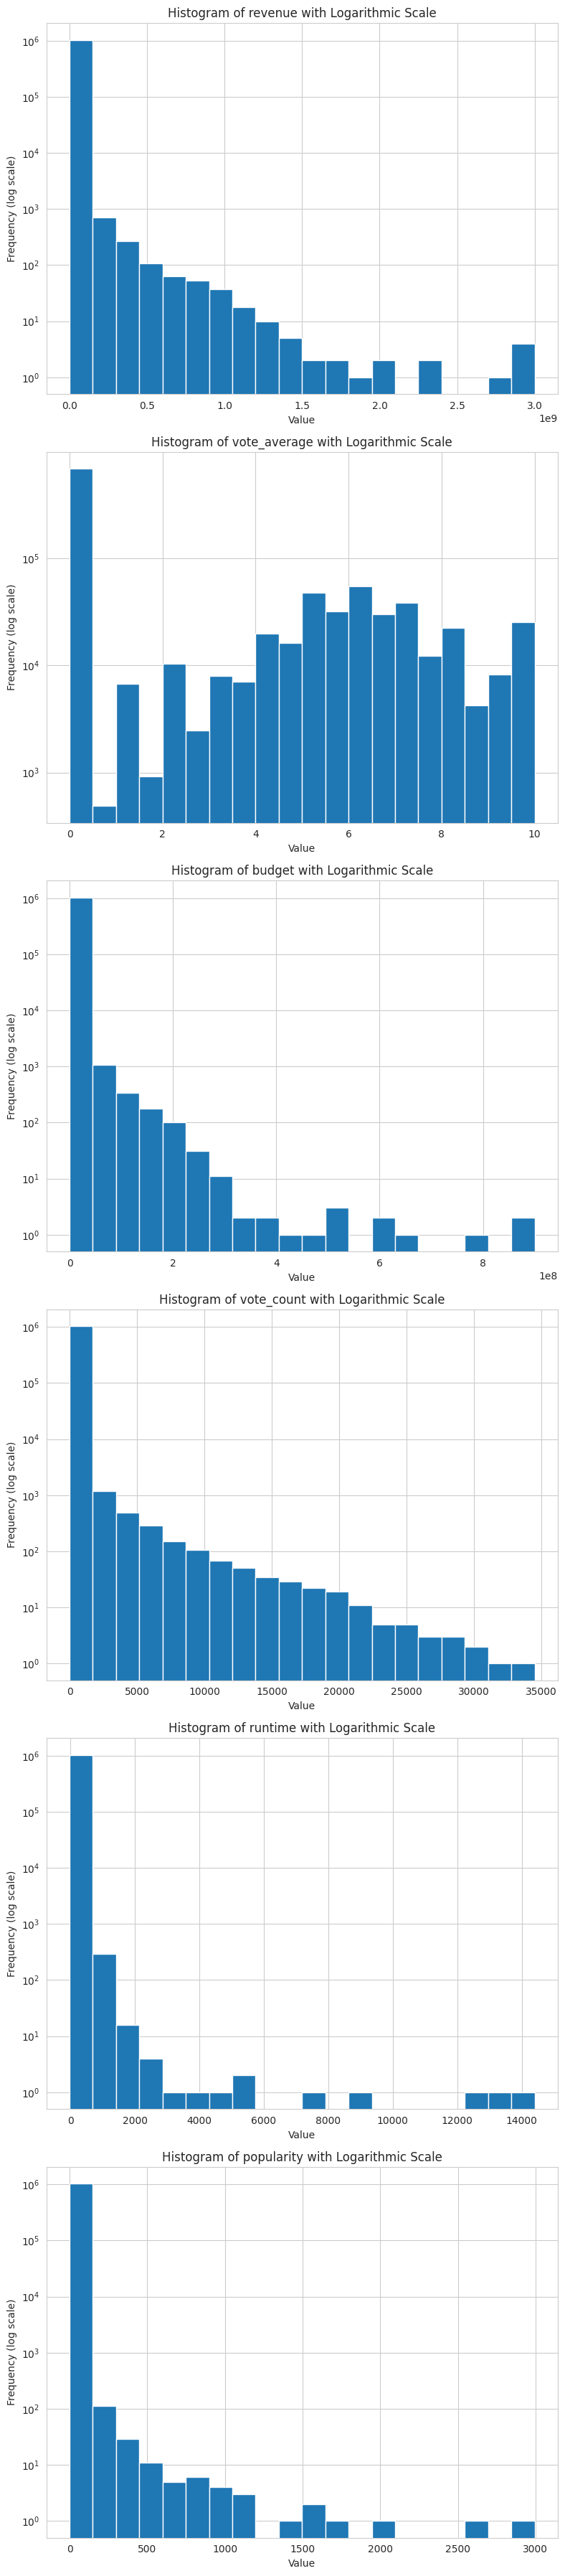

In [ ]:
# Columns to plot
columns_to_plot = ['revenue','vote_average', 'budget', 'vote_count', 'runtime', 'popularity']

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(8, 6 * len(columns_to_plot)))

# Create histograms with logarithmic scale for each column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(movies_df[column], bins=20)
    axes[i].set_yscale('log')
    axes[i].set_ylabel('Frequency (log scale)')
    axes[i].set_xlabel('Value')
    axes[i].set_title(f'Histogram of {column} with Logarithmic Scale')

plt.tight_layout()
plt.show()

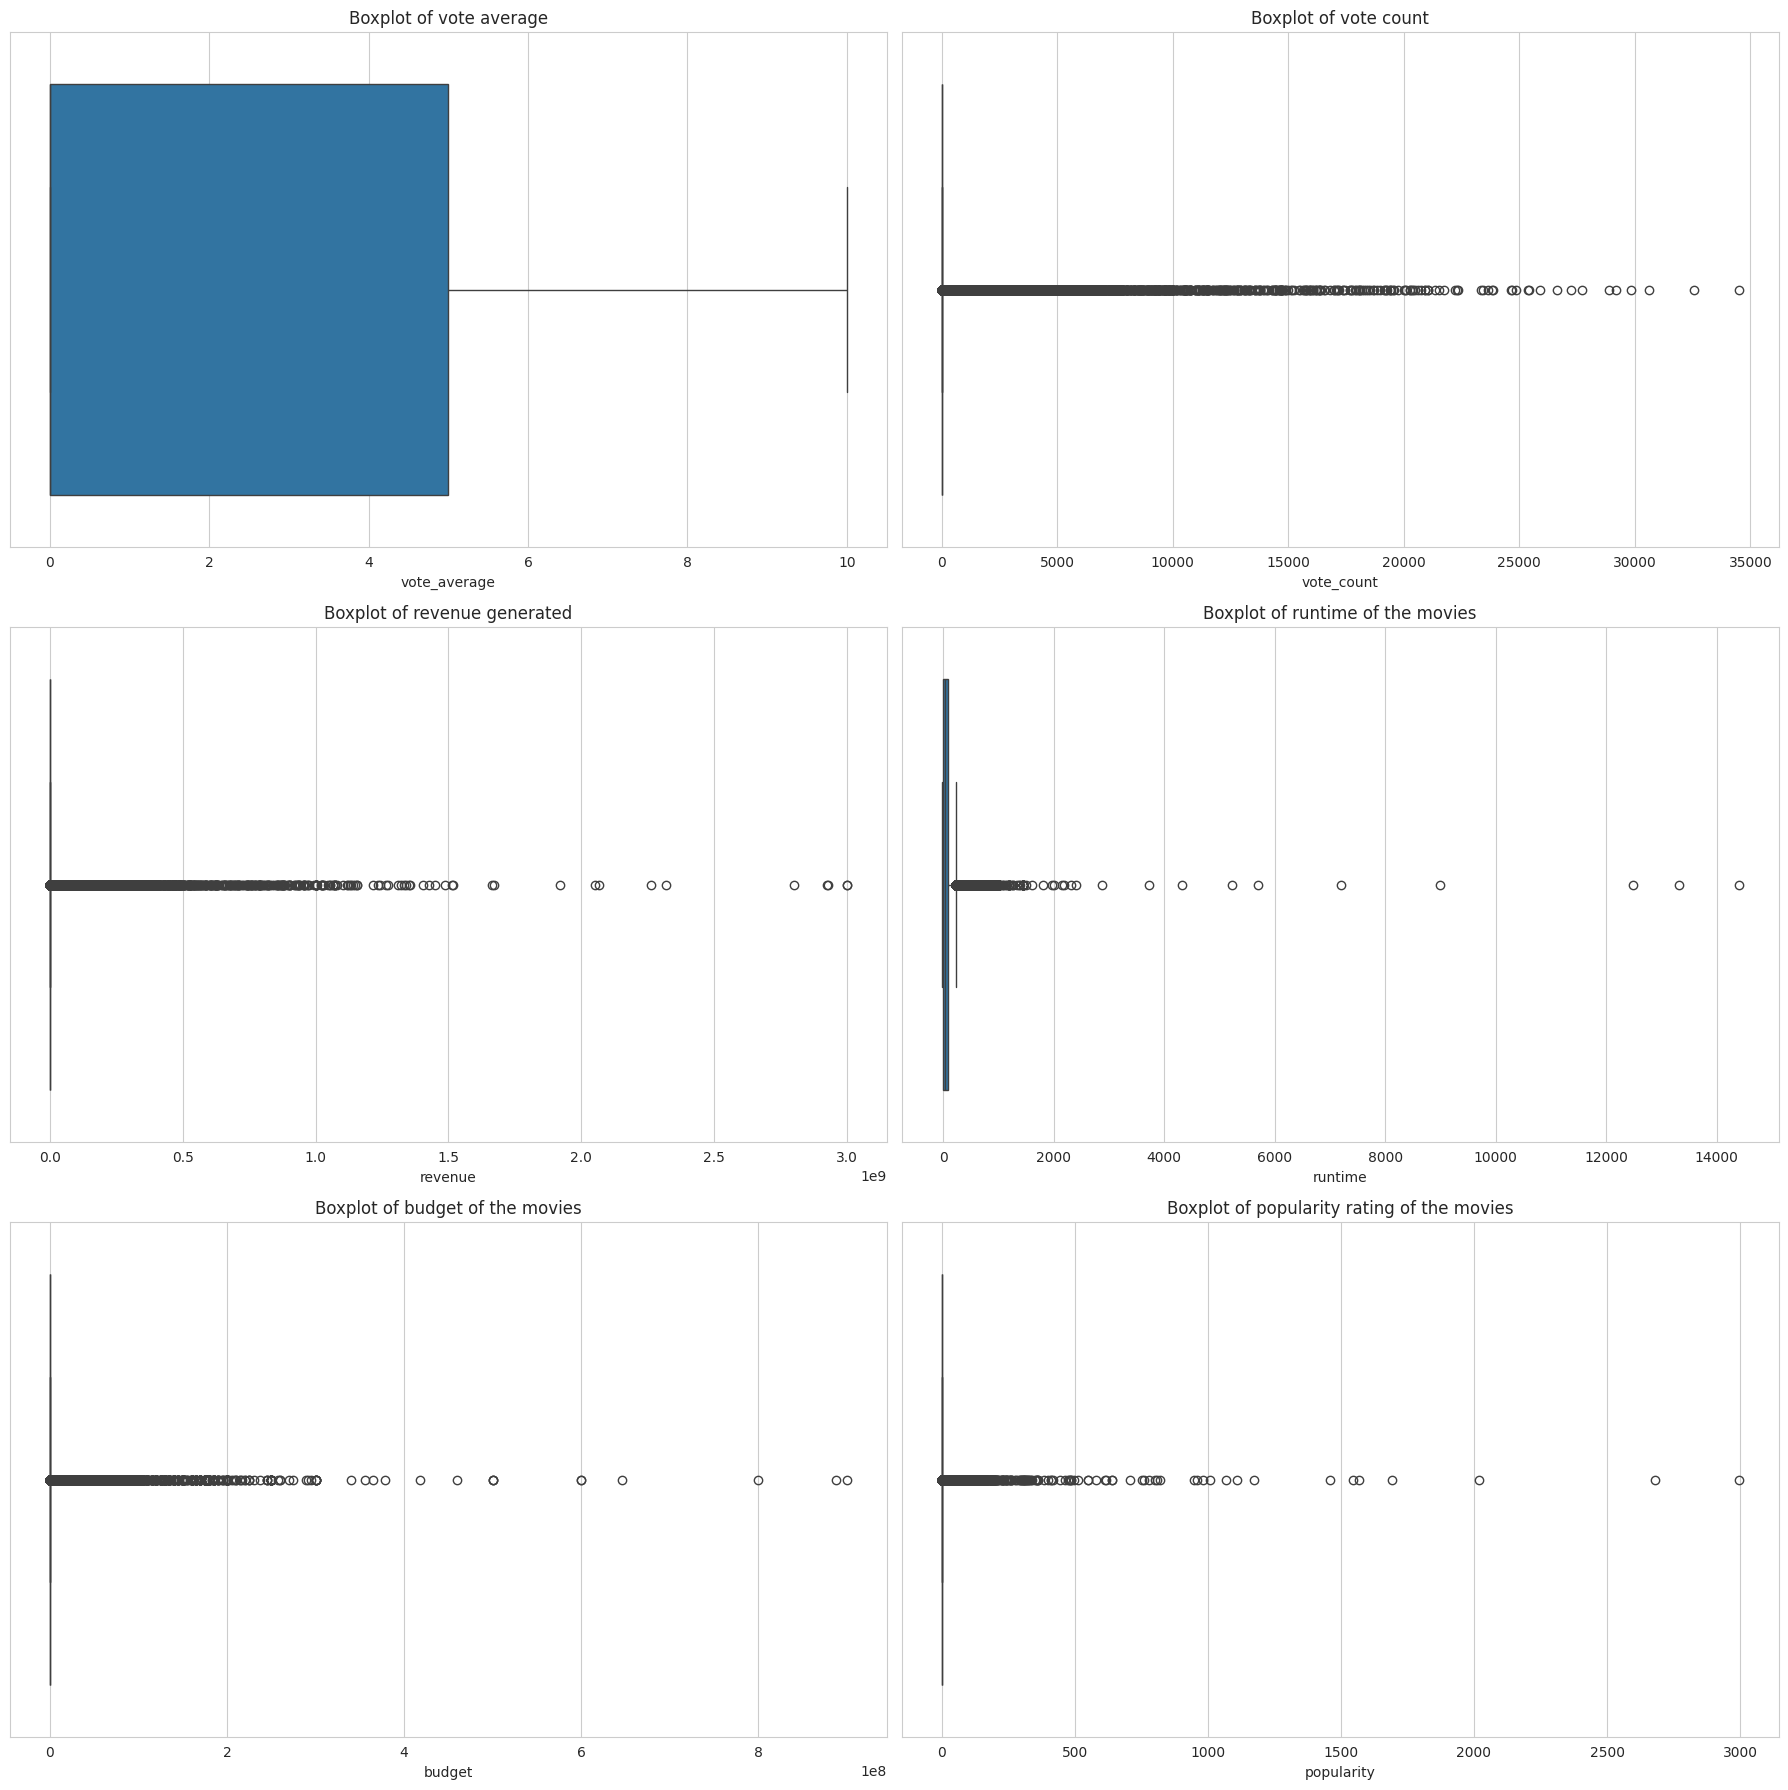

<Figure size 640x480 with 0 Axes>

In [ ]:
# Checking for outliers in the data

fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # Create a 3x2 grid of subplots

# Boxplot for 'vote_average'
sns.boxplot(x=movies_df['vote_average'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of vote average')

# Boxplot for 'vote_count'
sns.boxplot(x=movies_df['vote_count'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of vote count')

# Boxplot for 'revenue'
sns.boxplot(x=movies_df['revenue'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of revenue generated')

# Boxplot for 'runtime'
sns.boxplot(x=movies_df['runtime'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of runtime of the movies')

# Boxplot for 'budget'
sns.boxplot(x=movies_df['budget'], ax=axes[2, 0])
axes[2, 0].set_title('Boxplot of budget of the movies')

# Boxplot for 'popularity'
sns.boxplot(x=movies_df['popularity'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of popularity rating of the movies')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




plt.tight_layout()
plt.show()

<ipython-input-16-dcc0fe1447cb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['vote_average'], shade=True, ax=axes[0])
<ipython-input-16-dcc0fe1447cb>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['revenue'], shade=True, ax=axes[1])
<ipython-input-16-dcc0fe1447cb>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['budget'], shade=True, ax=axes[2])
<ipython-input-16-dcc0fe1447cb>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movies_df['vote_count'], shade=True

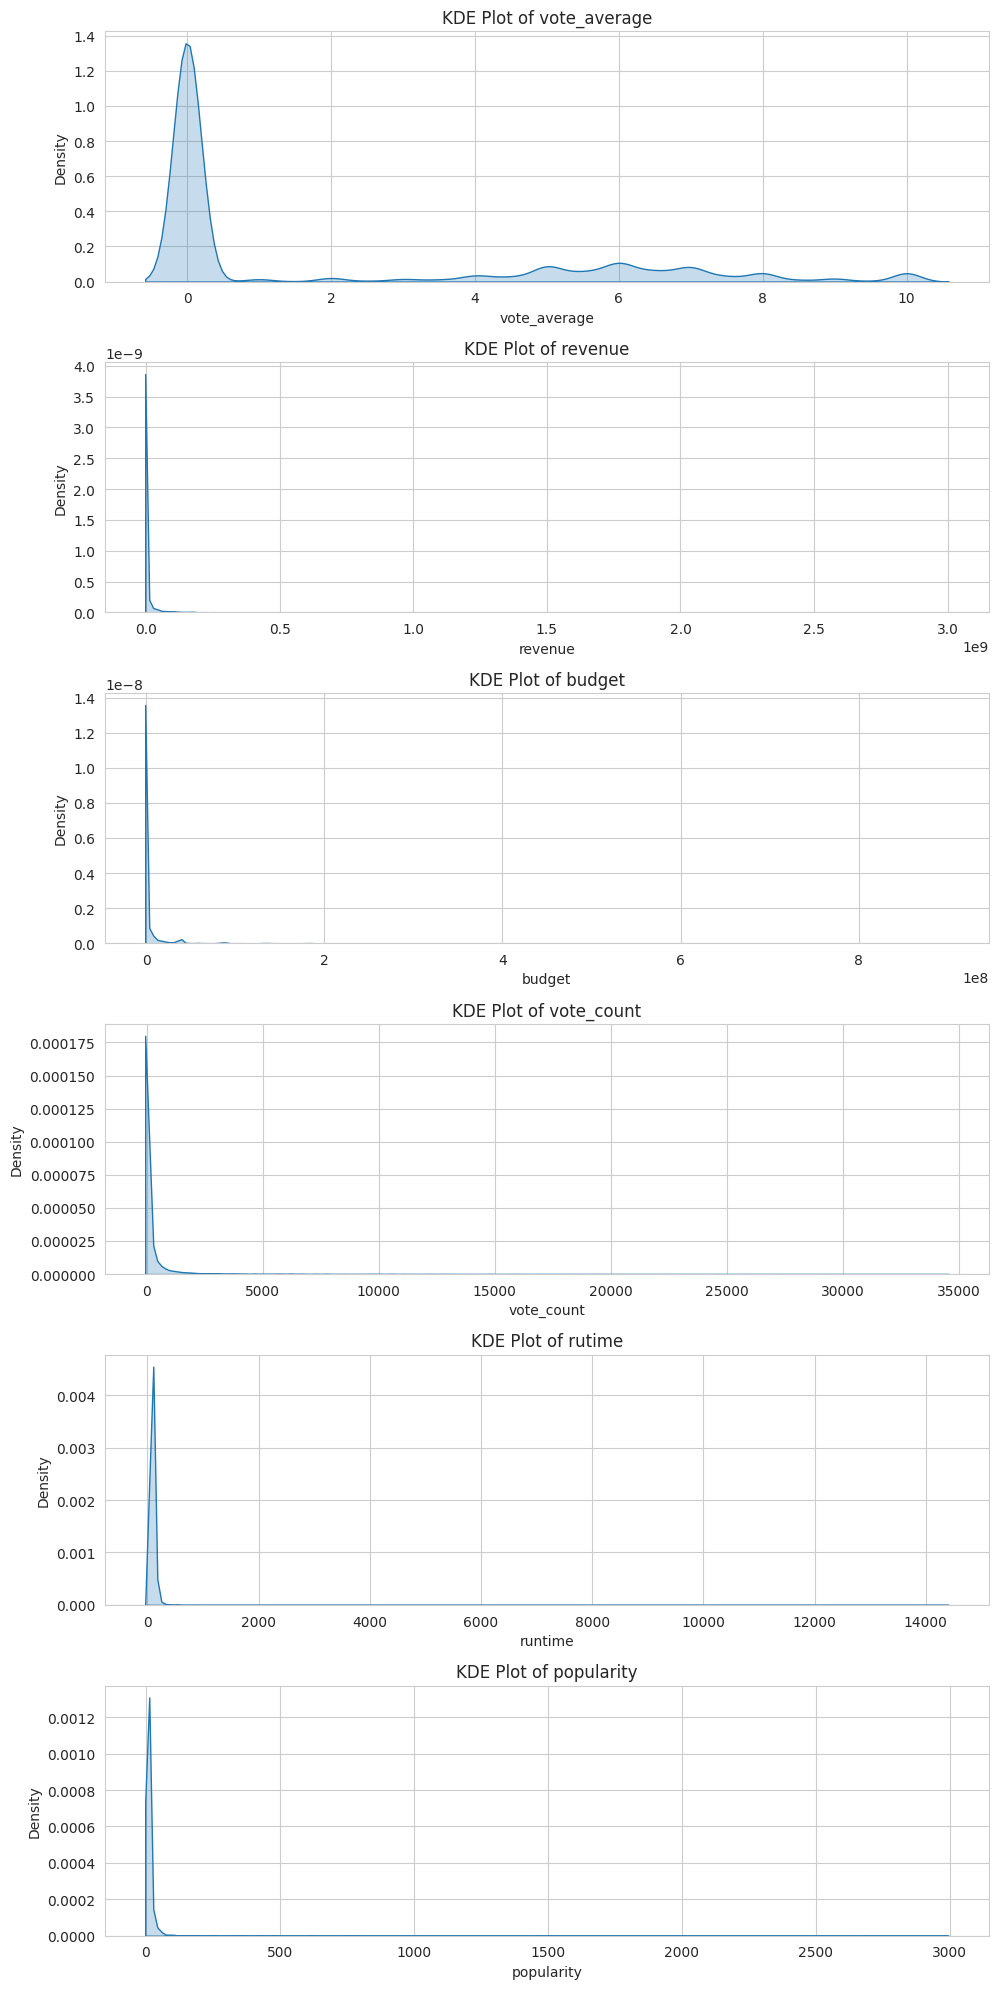

In [ ]:
## KDE plot

fig, axes = plt.subplots(6, 1, figsize=(10, 20))  # Create a 3x2 grid of subplots

# KDE plot for 'vote_average'
sns.kdeplot(movies_df['vote_average'], shade=True, ax=axes[0])
axes[0].set_title('KDE Plot of vote_average')

# KDE plot for 'revenue'
sns.kdeplot(movies_df['revenue'], shade=True, ax=axes[1])
axes[1].set_title('KDE Plot of revenue')

# KDE plot for 'budget'
sns.kdeplot(movies_df['budget'], shade=True, ax=axes[2])
axes[2].set_title('KDE Plot of budget')

# KDE plot for 'vote_count'
sns.kdeplot(movies_df['vote_count'], shade=True, ax=axes[3])
axes[3].set_title('KDE Plot of vote_count')

# KDE plot for 'runtime'
sns.kdeplot(movies_df['runtime'], shade=True, ax=axes[4])
axes[4].set_title('KDE Plot of rutime')

# KDE plot for 'popularity'
sns.kdeplot(movies_df['popularity'], shade=True, ax=axes[5])
axes[5].set_title('KDE Plot of popularity')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



                    id  vote_average  vote_count   revenue   runtime  \
id            1.000000     -0.440989   -0.087253 -0.053524 -0.209602   
vote_average -0.440989      1.000000    0.096190  0.059272  0.223603   
vote_count   -0.087253      0.096190    1.000000  0.725422  0.060282   
revenue      -0.053524      0.059272    0.725422  1.000000  0.042444   
runtime      -0.209602      0.223603    0.060282  0.042444  1.000000   
budget       -0.071751      0.071289    0.593078  0.679776  0.055309   
popularity   -0.085954      0.115708    0.253647  0.235878  0.069602   

                budget  popularity  
id           -0.071751   -0.085954  
vote_average  0.071289    0.115708  
vote_count    0.593078    0.253647  
revenue       0.679776    0.235878  
runtime       0.055309    0.069602  
budget        1.000000    0.249519  
popularity    0.249519    1.000000  


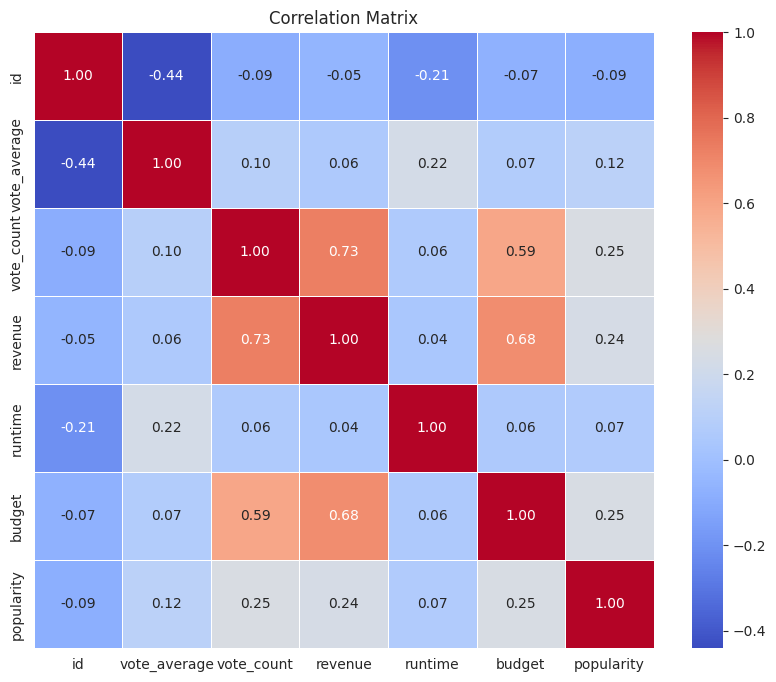

In [ ]:

numerical_columns = movies_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# **2. CLEANING THE DATA**

In [ ]:
#Convert release_date into date time format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
#movies_df.dtypes

#Deleting rows which have the title as null, This deletes original title as well
movies_df.dropna(subset=['title'], inplace=True)

#Deleting coloumns which aren't releveant to the data and have missing valuesin them
#('backdrop_path', 'imdb_id', 'overview', 'poster_path', 'tagline')
#columns_to_drop = ['backdrop_path', 'imdb_id', 'overview', 'poster_path', 'tagline']

movies_df.drop(columns=['overview','backdrop_path', 'imdb_id', 'poster_path', 'tagline', 'homepage','production_companies','keywords'], inplace=True)


In [ ]:
movies_df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
status                       0
release_date            129749
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               0
popularity                   0
genres                       0
production_countries    427407
spoken_languages        415150
dtype: int64

In [ ]:
# Drop rows with null values in 'production_countries' and 'release_date' columns
movies_df = movies_df.dropna(subset=['production_countries', 'release_date','spoken_languages'])




In [ ]:
assert movies_df.isnull().sum().sum() == 0, "Missing values present in the cleaned dataframe"
assert len(movies_df) > 100, "Unexpectedly low number of rows in the cleaned dataframe"


In [ ]:
# Trim leading and trailing spaces in "title" and "original_title" and "genres" columns
movies_df['title'] = movies_df['title'].str.strip()
movies_df['original_title'] = movies_df['original_title'].str.strip()
movies_df['genres'] = movies_df['genres'].str.strip()


In [ ]:
## Rows which do not have a title have been removed for the data set
## backdrop_path', 'imdb_id', 'poster_path', 'tagline' have been removed


num_rows = movies_df.shape[0]
num_columns = movies_df.shape[1]
print("Number of rows after removing null values: ",num_rows)
print("Number of columns after removing the null columns: ", num_columns)


# Display the updated dataframe info
print('\nUpdated Dataframe Information:')
movies_df.info()

# Display the first few rows of the cleaned dataframe
print('\nFirst Few Rows of the Cleaned Dataframe:')
movies_df.head()

Number of rows after removing null values:  477975
Number of columns after removing the null columns:  16

Updated Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
Index: 477975 entries, 0 to 1031180
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    477975 non-null  int64         
 1   title                 477975 non-null  object        
 2   vote_average          477975 non-null  float64       
 3   vote_count            477975 non-null  int64         
 4   status                477975 non-null  object        
 5   release_date          477975 non-null  datetime64[ns]
 6   revenue               477975 non-null  int64         
 7   runtime               477975 non-null  int64         
 8   adult                 477975 non-null  bool          
 9   budget                477975 non-null  int64         
 10  original_language     477975 non-null  obj

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",United States of America,"English, Hindi, Russian"


##**a) Handling the missing values in original languages and spoken language**

In [ ]:
# The original_language column is filled with the ISO code of the language. It has been converted to the default format
iso_to_language = {
    'eo': 'Esperanto',
    'es': 'Spanish',
    'et': 'Estonian',
    'eu': 'Basque',
    'de': 'German',
    'fa': 'Farsi',
    'fi': 'Finnish',
    'fo': 'Faroese',
    'fr': 'French',
    'gl': 'Galician',
    'gu': 'Gujarati',
    'he': 'Hebrew',
    'hi': 'Hindi',
    'hr': 'Croatian',
    'hu': 'Hungarian',
    'hy': 'Armenian',
    'id': 'Indonesian',
    'is': 'Icelandic',
    'it': 'Italian',
    'ja': 'Japanese',
    'ka': 'Georgian',
    'kk': 'Kazakh',
    'kn': 'Kannada',
    'ko': 'Korean',
    'kok': 'Konkani',
    'ky': 'Kyrgyz',
    'lt': 'Lithuanian',
    'lv': 'Latvian',
    'mi': 'Maori',
    'mk': 'Macedonian',
    'mn': 'Mongolian',
    'mr': 'Marathi',
    'ms': 'Malay',
    'mt': 'Maltese',
    'mt': 'Maltese',
    'nb': 'Norwegian',
    'nl': 'Dutch',
    'nn': 'Norwegian',
    'ns': 'Northern Sotho',
    'pa': 'Punjabi',
    'pl': 'Polish',
    'ps': 'Pashto',
    'pt': 'Portuguese',
    'qu': 'Quechua',
    'ro': 'Romanian',
    'ru': 'Russian',
    'sa': 'Sanskrit',
    'se': 'Sami',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'syr': 'Syriac',
    'ta': 'Tamil',
    'te': 'Telugu',
    'th': 'Thai',
    'tl': 'Tagalog',
    'tn': 'Tswana',
    'tr': 'Turkish',
    'tt': 'Tatar',
    'ts': 'Tsonga',
    'uk': 'Ukrainian',
    'ur': 'Urdu',
    'uz': 'Uzbek',
    'vi': 'Vietnamese',
    'xh': 'Xhosa',
    'zh': 'Chinese',
    'zu': 'Zulu',
    'aa': 'Afar',
    'ab': 'Abkhazian',
    'ae': 'Avestan',
    'af': 'Afrikaans',
    'ak': 'Akan',
    'am': 'Amharic',
    'an': 'Aragonese',
    'ar': 'Arabic',
    'as': 'Assamese',
    'av': 'Avaric',
    'ay': 'Aymara',
    'az': 'Azerbaijani',
    'ba': 'Bashkir',
    'be': 'Belarusian',
    'bg': 'Bulgarian',
    'bh': 'Bihari',
    'bi': 'Bislama',
    'bm': 'Bambara',
    'bn': 'Bengali',
    'bo': 'Tibetan',
    'br': 'Breton',
    'bs': 'Bosnian',
    'ca': 'Catalan',
    'ce': 'Chechen',
    'ch': 'Chamorro',
    'co': 'Corsican',
    'cr': 'Cree',
    'cs': 'Czech',
    'cu': 'Slavic',
    'cv': 'Chuvash',
    'cy': 'Welsh',
    'da': 'Danish',
    'de': 'German',
    'dv': 'Divehi',
    'dz': 'Dzongkha',
    'ee': 'Ewe',
    'el': 'Greek',
    'en': 'English',
    'eo': 'Esperanto',
    'es': 'Spanish',
    'et': 'Estonian',
    'eu': 'Basque',
    'fa': 'Persian',
    'ff': 'Fulah',
    'fi': 'Finnish',
    'fj': 'Fijian',
    'fo': 'Faroese',
    'fr': 'French',
    'fy': 'Frisian',
    'ga': 'Irish',
    'gd': 'Gaelic',
    'gl': 'Galician',
    'gn': 'Guarani',
    'gu': 'Gujarati',
    'gv': 'Manx',
    'ha': 'Hausa',
    'he': 'Hebrew',
    'hi': 'Hindi',
    'ho': 'Hiri Motu',
    'hr': 'Croatian',
    'ht': 'Haitian',
    'hu': 'Hungarian',
    'hy': 'Armenian',
    'hz': 'Herero',
    'ia': 'Interlingua',
    'id': 'Indonesian',
    'ie': 'Interlingue',
    'ig': 'Igbo',
    'ii': 'Sichuan',
    'ik': 'Inupiaq',
    'io': 'Ido',
    'is': 'Icelandic',
    'it': 'Italian',
    'iu': 'Inuktitut',
    'ja': 'Japanese',
    'jv': 'Javanese',
    'ka': 'Georgian',
    'kg': 'Kongo',
    'ki': 'Kikuyu',
    'kj': 'Kuanyama',
    'kk': 'Kazakh',
    'kl': 'Kalaallisut',
    'km': 'Khmer',
    'kn': 'Kannada',
    'ko': 'Korean',
    'kr': 'Kanuri',
    'ks': 'Kashmiri',
    'ku': 'Kurdish',
    'kv': 'Komi',
    'kw': 'Cornish',
    'ky': 'Kirghiz',
    'la': 'Latin',
    'lb': 'Luxembourgish',
    'lg': 'Ganda',
    'li': 'Limburgan',
    'ln': 'Lingala',
    'lo': 'Lao',
    'lt': 'Lithuanian',
    'lu': 'Luba-Katanga',
    'lv': 'Latvian',
    'mg': 'Malagasy',
    'mh': 'Marshallese',
    'mi': 'Maori',
    'mk': 'Macedonian',
    'ml': 'Malayalam',
    'mn': 'Mongolian',
    'mr': 'Marathi',
    'ms': 'Malay',
    'mt': 'Maltese',
    'my': 'Burmese',
    'na': 'Nauru',
    'nb': 'Bokmål',
    'nd': 'Ndebele',
    'ne': 'Nepali',
    'ng': 'Ndonga',
    'nl': 'Flemish',
    'nn': 'Nynorsk',
    'no': 'Norwegian',
    'nr': 'South_Ndebele',
    'nv': 'Navajo',
    'ny': 'Chichewa',
    'oc': 'Occitan',
    'oj': 'Ojibwa',
    'om': 'Oromo',
    'or': 'Oriya',
    'os': 'Ossetian',
    'pa': 'Punjabi',
    'pi': 'Pali',
    'pl': 'Polish',
    'ps': 'Pashto',
    'pt': 'Portuguese',
    'qu': 'Quechua',
    'rm': 'Romansh',
    'rn': 'Rundi',
    'ro': 'Romanian',
    'ru': 'Russian',
    'rw': 'Kinyarwanda',
    'sa': 'Sanskrit',
    'sc': 'Sardinian',
    'sd': 'Sindhi',
    'se': 'Sami',
    'sg': 'Sango',
    'si': 'Sinhalese',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'sm': 'Samoan',
    'sn': 'Shona',
    'so': 'Somali',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'ss': 'Swati',
    'st': 'Sotho',
    'su': 'Sundanese',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'ta': 'Tamil',
    'te': 'Telugu',
    'cn': 'Chinese',
    'sh':'Serbo_Croatian',
    'yi':'Yiddish',
    'wo':'Wolof',
    'tk':'Turkmen',
    'tg':'Tajik',
    'yo':'Yoruba',
    'mo':'Macao',
    'ug':'Uighur',
    'tw':'Twi',
    'ti':'Tigrinya',
    'ty':'Tahitian',
    'to':'Tonga',
    'za':'Zhuang'

}
movies_df['original_language'].replace(iso_to_language, inplace=True)
rows=movies_df['original_language'].value_counts()
print(rows)
rows.shape[0]


original_language
English     198686
Japanese     33330
French       31689
Spanish      28736
German       27414
             ...  
Komi             1
Oromo            1
Kongo            1
Ossetian         1
Sichuan          1
Name: count, Length: 165, dtype: int64


165

In [ ]:
# Language final


# Checking for the distinct values in Spoken_languages
print("The number of distinct values in spoken language: \n",movies_df['spoken_languages'].value_counts())

# Replacing the values in original_language where it is 'xx' with values in the spoken_language
movies_df.loc[movies_df['original_language'] == 'xx', 'original_language'] = movies_df.loc[movies_df['original_language'] == 'xx', 'spoken_languages']

# Checking if the values in spoken_languages and origina_language are the same by creating a var called 'Language_match' with boolean value
movies_df['languages_match'] = movies_df['original_language'] == movies_df['spoken_languages']

# Removing the null values present in the original_language columns
movies_df['original_language'].fillna('Silent_movie', inplace=True)
movies_df['spoken_languages'].fillna('Silent_movie', inplace=True)


# Replacing the mentioned values
movies_df['original_language'] = movies_df['original_language'].replace('No Language', 'Silent movie')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('No Language', 'Silent movie')

movies_df['original_language'] = movies_df['original_language'].replace('No Language, Spanish', 'Spanish')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('No Language, Spanish', 'Spanish')

movies_df['original_language'] = movies_df['original_language'].replace('English, No Language', 'English')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('English, No Language', 'English')

movies_df['original_language'] = movies_df['original_language'].replace('French, No Language', 'French')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('French, No Language ', 'French')

movies_df['original_language'] = movies_df['original_language'].replace('Estonian, Russian', 'Russian')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Estonian, Russian ', 'Russian')

movies_df['original_language'] = movies_df['original_language'].replace('Indonesian, No Language', 'Indonesian')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Indonesian, No Language ', 'Indonesian')

movies_df['original_language'] = movies_df['original_language'].replace('English, Korean', 'English')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('English, Korean', 'English')

movies_df['original_language'] = movies_df['original_language'].replace('Bengali, Hindi', 'Hindi')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Bengali, Hindi', 'Hindi')

movies_df['original_language'] = movies_df['original_language'].replace('No Language, Portuguese', 'Portuguese')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('No Language, Portuguese', 'Portuguese')

movies_df['original_language'] = movies_df['original_language'].replace('German, Japanese', 'German')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('German, Japane', 'German')

movies_df['original_language'] = movies_df['original_language'].replace('Arabic, Hebrew, No Language', 'Arabic')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Arabic, Hebrew, No Language', 'Arabic')

movies_df['original_language'] = movies_df['original_language'].replace('English, Arabic', 'Arabic')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('English, Arabic', 'Arabic')

movies_df['original_language'] = movies_df['original_language'].replace('Latin, No Language', 'Latin')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Latin, No Language', 'Latin')

movies_df['original_language'] = movies_df['original_language'].replace('Estonian, Japanese', 'Japanese')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Estonian, Japanese ', 'Japanese')

movies_df['original_language'] = movies_df['original_language'].replace('Bulgarian, No Language', 'Bulgarian')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Bulgarian, No Language', 'Bulgarian')

movies_df['original_language'] = movies_df['original_language'].replace('Danish, Latvian', 'Danish')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Danish, Latvian ', 'Danish')

movies_df['original_language'] = movies_df['original_language'].replace('Arabic, French', 'French')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Arabic, French', 'French')

movies_df['original_language'] = movies_df['original_language'].replace('Georgian, No Language', 'Georgian')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('Georgian, No Language ', 'Georgian')

movies_df['original_language'] = movies_df['original_language'].replace('English, Serbian', 'Serbian')
movies_df['spoken_languages'] = movies_df['spoken_languages'].replace('English, Serbian', 'Serbian')

# Removing the column languages_match
movies_df.drop(columns=['languages_match'], inplace=True)

print("\nThe number of distinct values in original language: \n",movies_df['original_language'].value_counts())


The number of distinct values in spoken language: 
 spoken_languages
English                                   162783
Japanese                                   31963
Spanish                                    26843
French                                     25502
No Language                                23771
                                           ...  
English, Galician, Spanish, Portuguese         1
Greek, German, Bulgarian                       1
Arabic, Dutch, English, Hungarian              1
English, German, Icelandic, Spanish            1
English, Persian, Somali, Spanish              1
Name: count, Length: 6397, dtype: int64

The number of distinct values in original language: 
 original_language
English                                        198707
Japanese                                        33339
French                                          31695
Spanish                                         28759
German                                          27419
         

#**b)Handling different values in genres**

In [ ]:
# Drop rows with missing values in the 'genres' column
movies_df.dropna(subset=['genres'], inplace=True)

# Count the number of rows in the 'genres' column with more than one word
more_than_one_word_count = movies_df['genres'].apply(lambda x: len(str(x).split(',')) > 1).sum()

# Display the count
print("Number of rows in 'genres' column with more than one word:", more_than_one_word_count)

# Count the number of rows in the 'genres' column with only one word
one_word_count = movies_df['genres'].apply(lambda x: len(str(x).split(',')) == 1).sum()

# Display the count
print("Number of rows in 'genres' column with one word:", one_word_count)


Number of rows in 'genres' column with more than one word: 172211
Number of rows in 'genres' column with one word: 305764


In [ ]:
# Create a DataFrame to contain rows with multiple genres
multiple_genres_df = movies_df[movies_df['genres'].str.split(',').apply(len) > 1]

# Count the occurrences of each unique combination of genres
multiple_genres_counts = multiple_genres_df['genres'].value_counts()

# Display the unique combinations and their counts
print("Genres with more than one word and their counts:")
print(multiple_genres_counts)


Genres with more than one word and their counts:
genres
Drama, Romance                                       7887
Comedy, Drama                                        6605
Drama, Comedy                                        4336
Comedy, Romance                                      4239
Romance, Drama                                       3205
                                                     ... 
Thriller, Comedy, Drama, Mystery, Science Fiction       1
Comedy, Crime, Action, Romance                          1
Crime, Drama, Thriller, Mystery, TV Movie               1
Drama, TV Movie, Adventure, History                     1
Fantasy, Comedy, Action, Family                         1
Name: count, Length: 10783, dtype: int64


In [ ]:
print(movies_df.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'original_language',
       'original_title', 'popularity', 'genres', 'production_countries',
       'spoken_languages'],
      dtype='object')


In [ ]:
# Filter rows where genres contain 'nan' and overview is NaN or 'NaN'
movies_with_nan_values = movies_df[(movies_df['genres'].astype(str).str.contains('nan', na=False))]

# Display filtered rows
print("Movies with 'nan' in genres and NaN/'NaN' in overview:")
print(movies_with_nan_values)

# Count of rows matching the criteria
count_nan_values = len(movies_with_nan_values)
print("\nCount of movies with 'nan' in genres and NaN/'NaN' in overview:", count_nan_values)



Movies with 'nan' in genres and NaN/'NaN' in overview:
             id                                             title  \
8578      50472                              Anplagghed al cinema   
9790     464446                                            Return   
11390    596601                              Prison High Pressure   
11650    834860                                            RETURN   
13010     83050                 Hot Chocolate: A Romp in the Dark   
...         ...                                               ...   
1031162  681132                                         Oltremare   
1031166  681100                                            Bardot   
1031167  681077                  Hot Celeb Can't Control Her Lust   
1031168  681078  Minimal Mosaic: Yuma Asami Fucked Hard in School   
1031176  681091                           My Stepmom's a Squirter   

         vote_average  vote_count    status release_date  revenue  runtime  \
8578            7.000         322  Rel

In [ ]:
# Remove rows where genres contain 'nan' and overview is NaN or 'NaN'
movies_df = movies_df[~((movies_df['genres'].astype(str).str.contains('nan', na=False)))]

# Check if any rows remain with 'nan' in genres and NaN/'NaN' in overview
movies_with_nan_values = movies_df[(movies_df['genres'].astype(str).str.contains('nan', na=False))]

# Print the count of remaining rows with 'nan' in genres and NaN/'NaN' in overview
print("Count of movies with 'nan' in genres and NaN/'NaN' in overview after removal:", len(movies_with_nan_values))


Count of movies with 'nan' in genres and NaN/'NaN' in overview after removal: 0


In [ ]:
print('Rows: ',movies_df.shape[0])
print('Columns:',movies_df.shape[1])


Rows:  402191
Columns: 16


In [ ]:
movies_df.isnull().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
original_title          0
popularity              0
genres                  0
production_countries    0
spoken_languages        0
dtype: int64

In [ ]:
movies_df.shape

(402191, 16)

In [ ]:
#make the genre into list and each movie a sublist
genres_data = movies_df['genres'].apply(lambda x: [] if pd.isna(x) else [genre.strip() for genre in x.split(",")])

#filter and pint all the genre type
unique_genres = sorted(list(set([genre for sublist in genres_data for genre in sublist])))


#add 20 genre encoding colums to the dataframe
for genre in unique_genres:
    movies_df[genre] = genres_data.apply(lambda x: 1 if genre in x else 0)

In [ ]:
movies_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'original_language',
       'original_title', 'popularity', 'genres', 'production_countries',
       'spoken_languages', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
movies_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,0,0,0,0,0,1,0,0,0,0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,0,0,0,0,0,1,0,0,0,0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,0,0,0,0,0,0,0,1,0,0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,0,0,0,0,0,1,0,0,0,0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,0,0,0,0,0,1,0,0,0,0


# **Storing Data In 3 Formats**

In [ ]:
#Sqlite3
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('movies.db')

# Save DataFrame to SQLite database
movies_df.to_sql('movies_table', conn, if_exists='replace', index=False)

# Close connection
conn.close()


In [ ]:
# Save DataFrame to CSV file
movies_df.to_csv('movies.csv', index=False)


In [ ]:
# Save DataFrame to Excel file
movies_df.to_excel('movies.xlsx', index=False)


In [ ]:
# Save DataFrame to JSON file
movies_df.to_json('movies.json', orient='records')


# **3. DATA ANALYSIS**

# **1. ANALYSIS OF LANGUAGES OF THE MOVIES**

## **a)Percent distribution of the languages in the data set**

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts of original_language column
language_counts = movies_df["original_language"].value_counts()

# Calculate the percentages
percentages = (language_counts / language_counts.sum()) * 100

# Filter out languages with 0% percentage
language_counts = language_counts[percentages != 0]
percentages = percentages[percentages != 0]

# Plotting the horizontal bar plot
plt.figure(figsize=(30, 30))
language_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Original Language')
plt.title('Distribution of Original Languages')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(language_counts[i], i, f'{percentage:.1f}%', va='center')

plt.show()

### **Distribution of the top 10 languages**

In [ ]:
top_languages = language_counts.head(10)
print(top_languages)

In [ ]:
# Get the value counts of original_language column
language_counts = movies_df["original_language"].value_counts()

# Calculate the percentages
percentages = (language_counts / language_counts.sum()) * 100

# Select the top 10 languages
top_languages = language_counts.head(10)
top_percentages = percentages.head(10)


In [ ]:
import plotly.graph_objects as go

# Assuming 'top_languages' is your Series containing the top languages
# Assuming 'top_percentages' is your Series containing the corresponding percentages
# Ensure both 'top_languages' and 'top_percentages' are defined properly before this point

# Create a bar chart trace
bar_trace = go.Bar(
    y=top_languages.index,
    x=top_languages.values,
    orientation='h',
    text=[f'{p:.1f}%' for p in top_percentages],
    textposition='auto',
    marker=dict(color='skyblue')
)

# Create a layout
layout = go.Layout(
    title='Distribution of top 10 Languages',
    xaxis=dict(title='Number of Movies'),
    yaxis=dict(title='Original Language'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()




### **Pie chart distribution of the top 10 languages**

In [ ]:
import plotly.graph_objects as go

# Create a pie chart trace
pie_trace = go.Pie(
    labels=top_languages.index,
    values=top_languages.values,
    hoverinfo='label+percent',
    hole=0.3
)

# Create a layout
layout = go.Layout(
    title='Distribution of top 10 Original Languages',
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[pie_trace], layout=layout)

# Show the interactive graph
fig.show()


## **b)Average vote rating per language**

In [ ]:
import pandas as pd

# Assuming top_languages is a Series containing the top 10 languages
top_languages = movies_df["original_language"].value_counts().head(10)

# Filter the DataFrame to include only the rows with the top 10 languages
top_languages_df = movies_df[movies_df["original_language"].isin(top_languages.index)]

# Calculate the average of vote_average for each language
avg_vote_by_language = top_languages_df.groupby("original_language")["vote_average"].mean()

# Display the result
print(avg_vote_by_language)

In [ ]:
import plotly.graph_objects as go

# Create a bar chart trace
bar_trace = go.Bar(
    x=avg_vote_by_language.index,
    y=avg_vote_by_language.values,
    marker=dict(color='skyblue'),
    hoverinfo='y',
)

# Create a layout
layout = go.Layout(
    title='Average Vote by Language',
    xaxis=dict(title='Original Language'),
    yaxis=dict(title='Average Vote'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()


### **Average vote rating per language after removing the rows where the vote count is 0**

In [ ]:
# Assuming 'movies_df' is your DataFrame
top_languages_df = top_languages_df[(top_languages_df['vote_count'] != 0) & (top_languages_df['adult'] != True)]

# Calculate the average of vote_average for each language
avg_vote_by_language = top_languages_df.groupby("original_language")["vote_average"].mean()

# Display the result
print(avg_vote_by_language)

In [ ]:
import plotly.graph_objects as go

# Create a bar chart trace
bar_trace = go.Bar(
    x=avg_vote_by_language.index,
    y=avg_vote_by_language.values,
    marker=dict(color='skyblue'),
    hoverinfo='y',
)

# Create a layout
layout = go.Layout(
    title='Average Vote by Language',
    xaxis=dict(title='Original Language'),
    yaxis=dict(title='Average Vote'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()


##**c)Vote count per language**

In [ ]:
# Assuming 'top_languages_df' is your DataFrame containing the top 10 languages
total_vote_count_by_language = top_languages_df.groupby('original_language')['vote_count'].sum()

# Display the result
print(total_vote_count_by_language)

In [ ]:
import plotly.graph_objects as go

# Create a bar chart trace
bar_trace = go.Bar(
    x=total_vote_count_by_language.index,
    y=total_vote_count_by_language.values,
    marker=dict(color='skyblue'),
    hoverinfo='y',
)

# Create a layout
layout = go.Layout(
    title='Total Vote Count per Language for the top 10 languages',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Total Vote Count'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()


##**Average vote count for the top 10 languages**

In [ ]:
# Filter the DataFrame to include only the top 10 languages
top_10_languages = movies_df['original_language'].value_counts().head(10).index
top_languages_df = movies_df[movies_df['original_language'].isin(top_10_languages)]

# Calculate the average vote count for each language
avg_vote_count_by_language = top_languages_df.groupby('original_language')['vote_count'].mean()

# Display the result
print(avg_vote_count_by_language)

In [ ]:
import plotly.graph_objects as go

# Assuming 'avg_vote_count_by_language' is your Series containing the average vote count by language

# Create a bar chart trace
bar_trace = go.Bar(
    x=avg_vote_count_by_language.index,
    y=avg_vote_count_by_language.values,
    marker_color='skyblue',
    name='Average Vote Count'
)

# Create a layout
layout = go.Layout(
    title='Average Vote Count per Language for the Top 10 Languages',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Vote count'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()

###**Total revenue per language**

In [ ]:
# Filter the DataFrame to include only the top 10 languages
top_10_languages = movies_df['original_language'].value_counts().head(10).index
top_languages_df = movies_df[movies_df['original_language'].isin(top_10_languages)]

# Calculate the total revenue for each language
total_revenue_by_language = top_languages_df.groupby('original_language')['revenue'].sum()

# Display the result
print(total_revenue_by_language)

In [ ]:
import plotly.graph_objects as go

# Assuming 'total_revenue_by_language' is your Series containing the total revenue by language

# Create a bar chart trace
bar_trace = go.Bar(
    x=total_revenue_by_language.index,
    y=total_revenue_by_language.values,
    marker_color='skyblue',
    name='Total Revenue'
)

# Create a layout
layout = go.Layout(
    title='Total Revenue for the Top 10 Languages',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Dollars (100 Billion)'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()


###**Average revenue per language**

In [ ]:
# Filter the DataFrame to include only the top 10 languages
top_10_languages = movies_df['original_language'].value_counts().head(10).index
top_languages_df = movies_df[movies_df['original_language'].isin(top_10_languages)]

# Calculate the average revenue for each language
average_revenue_by_language = top_languages_df.groupby('original_language')['revenue'].mean()


#pd.options.display.float_format = None
pd.options.display.float_format = '{:,.2f}'.format
# Display the average revenue for each language
print(average_revenue_by_language)

In [ ]:
import plotly.graph_objects as go

# Assuming 'average_revenue_by_language' is your Series containing the average revenue by language

# Create a bar chart trace
bar_trace = go.Bar(
    x=average_revenue_by_language.index,
    y=average_revenue_by_language.values,
    marker_color='skyblue',
    name='Average Revenue'
)

# Create a layout
layout = go.Layout(
    title='Average Revenue for the Top 10 Languages',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Dollars (Millions)'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive graph
fig.show()




# **2. ANALYSIS OF GENRES OF THE MOVIES**

In [ ]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
                 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
                 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
genre_counts = movies_df[genre_columns].sum()
genre_counts

###**sum of each genres appeared**

In [ ]:
import plotly.graph_objs as go

# Sort the genre counts in ascending order
sorted_genre_counts = genre_counts.sort_values(ascending=False)

# Create a bar plot trace
bar_trace = go.Bar(x=sorted_genre_counts.index, y=sorted_genre_counts.values, marker=dict(color='skyblue'))

# Create layout
layout = go.Layout(title='Genre Distribution in Movies Dataset',
                   xaxis=dict(title='Genre'),
                   yaxis=dict(title='Count'),
                   xaxis_tickangle=-45)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the plot
fig.show()



###**genre trend graph**

In [ ]:
import plotly.express as px
genre_by_year = movies_df.groupby('release_date')[genre_columns].sum()
# Convert genre_by_year DataFrame to long format
genre_by_year_long = genre_by_year.reset_index().melt(id_vars='release_date', var_name='Genre', value_name='Number of Movies')

# Plotting genre trends over the years interactively using Plotly
fig = px.line(genre_by_year_long, x='release_date', y='Number of Movies', color='Genre',
              title='Genre Trends Over Years', labels={'release_date': 'Year', 'Number of Movies': 'Number of Movies'})

# Show the plot
fig.show()


###**top 3 (numbers) genres for each year**

In [ ]:
# Convert to datetime objects
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year
movies_df['release_year'] = movies_df['release_date'].dt.year

# Count the occurrences of each genre
genre_counts_by_year = movies_df.groupby('release_year')[genre_columns].sum()
top_genres_by_year = []

# Iterate over each year and find the top 3 genres
for year in genre_counts_by_year.index:
    year_genre_counts = genre_counts_by_year.loc[year]
    top_3_genres = year_genre_counts.sort_values(ascending=False).index[:3].tolist()
    top_genres_by_year.append({
        'Year': year,
        'Top 1 Genre': top_3_genres[0],
        'Top 2 Genre': top_3_genres[1],
        'Top 3 Genre': top_3_genres[2]
    })

top_genres_by_year_df = pd.DataFrame(top_genres_by_year)
print(top_genres_by_year_df)

     Year      Top 1 Genre      Top 2 Genre      Top 3 Genre
0    1874      Documentary           Action           Horror
1    1878        Animation           Action           Horror
2    1885        Animation           Action           Horror
3    1887      Documentary           Action           Horror
4    1888      Documentary           Action           Horror
..    ...              ...              ...              ...
145  2029           Action         Thriller  Science Fiction
146  2030           Action          Fantasy        Adventure
147  2031           Action  Science Fiction        Adventure
148  2074      Documentary           Action           Horror
149  2099  Science Fiction            Drama           Action

[150 rows x 4 columns]


## **Top 3 genres for the last ten years**

In [ ]:
# Filter data for the years 2010-2024
filtered_data = top_genres_by_year_df[top_genres_by_year_df['Year'].between(2010, 2024)]

# Print the filtered DataFrame
print(filtered_data)


     Year Top 1 Genre  Top 2 Genre Top 3 Genre
126  2010       Drama  Documentary      Comedy
127  2011       Drama  Documentary      Comedy
128  2012       Drama  Documentary      Comedy
129  2013       Drama  Documentary      Comedy
130  2014       Drama  Documentary      Comedy
131  2015       Drama  Documentary      Comedy
132  2016       Drama  Documentary      Comedy
133  2017       Drama  Documentary      Comedy
134  2018       Drama  Documentary      Comedy
135  2019       Drama  Documentary      Comedy
136  2020       Drama  Documentary      Comedy
137  2021       Drama  Documentary      Comedy
138  2022       Drama  Documentary      Comedy
139  2023       Drama  Documentary      Comedy
140  2024       Drama  Documentary      Comedy


###**genre popularity score for last ten years**

In [ ]:

movies_df[genre_columns] = movies_df[genre_columns].astype(int)

genre_popularity_sums = {}
recent_years = range(2014, 2024)
# Iterate over each genre column
for genre in genre_columns:
    genre_movies = movies_df[( movies_df[genre] == 1) & (movies_df['release_year'].isin(recent_years))]
    popularity_sum = genre_movies['popularity'].mean()
    genre_popularity_sums[genre] = popularity_sum

# Convert the dictionary to DataFrame
genre_popularity_df = pd.DataFrame(list(genre_popularity_sums.items()), columns=['Genre', 'Popularity Mean'])

# Sort by mean popularity in descending order
genre_popularity_df = genre_popularity_df.sort_values(by='Popularity Mean', ascending=False)

# Display the popularity mean for each genre
print(genre_popularity_df)

              Genre  Popularity Mean
1         Adventure            11.38
0            Action             9.00
14  Science Fiction             6.53
16         Thriller             6.12
8           Fantasy             5.76
12          Mystery             5.33
7            Family             5.31
4             Crime             5.28
17              War             4.55
18          Western             3.77
10           Horror             3.75
13          Romance             3.73
2         Animation             3.55
9           History             3.32
3            Comedy             3.16
15         TV Movie             2.78
6             Drama             2.67
11            Music             1.62
5       Documentary             1.07


###**genre votes score for last ten years**

In [ ]:
movies_df[genre_columns] = movies_df[genre_columns].astype(int)

genre_vote_average_sums = {}
recent_years = range(2014, 2024)
# Iterate over each genre column
for genre in genre_columns:
    genre_movies = movies_df[( movies_df[genre] == 1) & (movies_df['release_year'].isin(recent_years))]
    vote_average_sum = genre_movies['vote_average'].mean()
    genre_vote_average_sums[genre] = vote_average_sum

# Convert the dictionary to DataFrame
genre_vote_average_df = pd.DataFrame(list(genre_vote_average_sums.items()), columns=['Genre', 'vote_average'])

# Sort by total vote_average mean
genre_vote_average_df = genre_vote_average_df.sort_values(by='vote_average', ascending=False)

# Display the total vote_average mean for each genre
print(genre_vote_average_df)

              Genre  vote_average
15         TV Movie          4.99
1         Adventure          4.74
9           History          4.44
17              War          4.42
7            Family          4.36
4             Crime          4.31
0            Action          4.24
16         Thriller          4.23
12          Mystery          4.03
18          Western          4.01
13          Romance          3.93
3            Comedy          3.92
14  Science Fiction          3.90
8           Fantasy          3.84
11            Music          3.42
6             Drama          3.37
10           Horror          3.09
2         Animation          2.88
5       Documentary          2.64


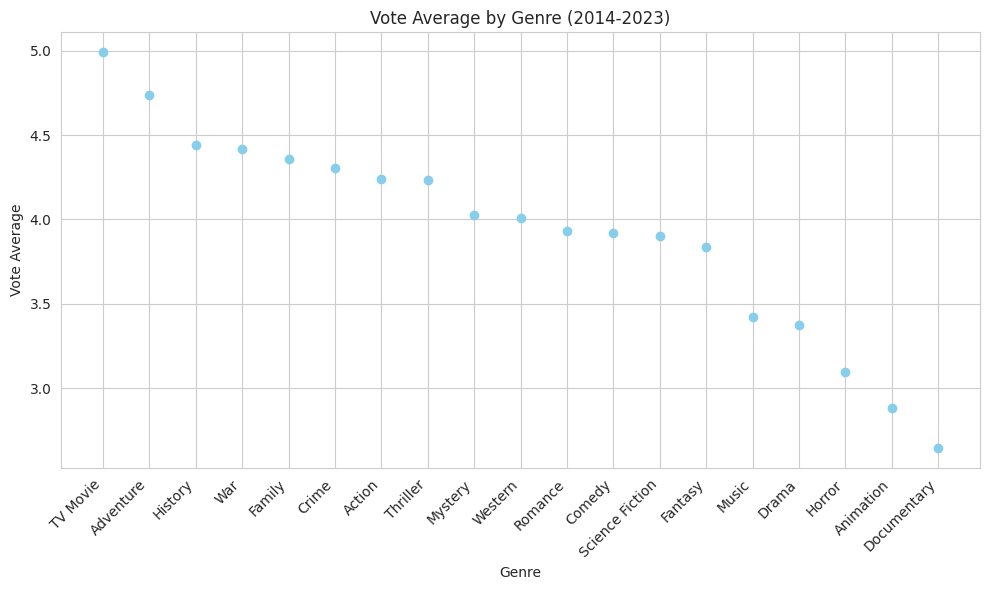

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_vote_average_df['Genre'], genre_vote_average_df['vote_average'], color='skyblue')
plt.title('Vote Average by Genre (2014-2023)')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


# **3. ANALYSIS OF RETURN ON INVESTMENT (ROI)**
For the purpose of this analysis. We are only considering those movies which have been released in theatres. The movies which have a revenue of 0 means that they were released online on streaming platforms or any other method.

We have engineered our own feature called ROI, which is calculated as follows:

**ROI = [ ( Revenue - Budget )/Budget ]*100**



In [ ]:
movies_df['revenue'].value_counts()

revenue
0           385624
100            172
1              134
100000         102
10000           78
             ...  
63118386         1
5967038          1
69412425         1
58500000         1
81665            1
Name: count, Length: 13463, dtype: int64

We are imputing the values where budget is 0 with the mean grouped by revenue and runtime.

In [ ]:
# Calculate the average budget for movies with non-zero budget
average_budget = movies_df[movies_df['budget'] != 0].groupby(['revenue', 'runtime'])['budget'].mean().reset_index()

# Merge average budget values with missing budget rows based on revenue and runtime
merged_data = pd.merge(movies_df[movies_df['budget'] == 0], average_budget, on=['revenue', 'runtime'], how='left')

# Update missing budget values with the calculated averages
movies_df.loc[movies_df['budget'] == 0, 'budget'] = merged_data['budget_y']

# Fill remaining missing budget values with overall average
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)

In [ ]:
movies_df['budget'].describe()

count       402,191.00
mean      3,244,203.06
std       7,665,695.65
min               1.00
25%       1,652,861.00
50%       3,244,203.06
75%       3,244,203.06
max     888,000,000.00
Name: budget, dtype: float64

In [ ]:
# Create a new DataFrame with non-zero values for 'revenue' and 'budget'
non_zero_df = movies_df[(movies_df['revenue'] != 0) & (movies_df['budget'] != 0)]

# Display the first few rows of the new DataFrame
non_zero_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,"160,000,000.00",...,0,0,0,0,1,0,0,0,0,2010
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,"165,000,000.00",...,0,0,0,0,1,0,0,0,0,2014
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,"185,000,000.00",...,0,0,0,0,0,0,1,0,0,2008
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,"237,000,000.00",...,0,0,0,0,1,0,0,0,0,2009
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,"220,000,000.00",...,0,0,0,0,1,0,0,0,0,2012


In [ ]:
# Calculate ROI for each row
non_zero_df['ROI'] = ((non_zero_df['revenue'] - non_zero_df['budget']) / non_zero_df['budget']) * 100

# Display the DataFrame with ROI column
non_zero_df.head()

<ipython-input-70-3470fec5be4a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year,ROI
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,"160,000,000.00",...,0,0,0,1,0,0,0,0,2010,415.96
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,"165,000,000.00",...,0,0,0,1,0,0,0,0,2014,325.29
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,"185,000,000.00",...,0,0,0,0,0,1,0,0,2008,443.00
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,"237,000,000.00",...,0,0,0,1,0,0,0,0,2009,"1,133.63"
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,"220,000,000.00",...,0,0,0,1,0,0,0,0,2012,590.37


Upon further analysis we have seen that there are movies which have an ROI of over 10,000 which is very impractical. As a result we have filtered our data frame to include only those movies have an ROI of 10,000 and less.

In [ ]:
# Filter out rows with ROI greater than 1000%
filtered_df = non_zero_df[non_zero_df['ROI'] <= 10000]
filtered_df['ROI'].describe()

count   16,252.00
mean       306.01
std        978.40
min       -100.00
25%        -71.38
50%         25.31
75%        245.02
max      9,958.81
Name: ROI, dtype: float64

##**a) ROI for the top 10 languages based on the number of movies in the data set**

In [ ]:
# Group by 'original_language' column and calculate total ROI and count of movies for each language
language_groups = filtered_df.groupby('original_language')
language_stats = language_groups.agg({'ROI': 'mean', 'title': 'count'}).reset_index()
language_stats.rename(columns={'title': 'movie_count'}, inplace=True)

# Sort the languages based on the count of movies
language_stats.sort_values(by='movie_count', ascending=False, inplace=True)

# Select the top 10 languages
top_10_languages = language_stats.head(10)

# Display the average ROI for the top 10 languages
print(top_10_languages)


   original_language    ROI  movie_count
21           English 282.07        10525
69           Spanish 185.96          685
25            French 179.40          621
15           Chinese 819.01          594
41          Japanese 609.67          451
63           Russian 140.99          429
34             Hindi 312.76          397
40           Italian 220.83          271
29            German 305.00          270
45            Korean 587.15          248


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a bar chart trace for number of movies
bar_trace = go.Bar(
    x=top_10_languages['original_language'],  # Swap x and y for horizontal bar chart
    y=top_10_languages['movie_count'],
    name='Number of Movies',
    marker=dict(color='lightblue'),
)

# Create a line chart trace for average ROI
line_trace = go.Scatter(
    x=top_10_languages['original_language'],
    y=top_10_languages['ROI'],
    mode='lines+markers',
    name='Average ROI',
    marker=dict(color='skyblue')
)

# Create a subplot with one row and two columns
fig = make_subplots(rows=1, cols=2, shared_xaxes=True, subplot_titles=('Number of Movies', 'Average ROI'))

# Add the bar trace to the first subplot
fig.add_trace(bar_trace, row=1, col=1)

# Add the line trace to the second subplot
fig.add_trace(line_trace, row=1, col=2)

# Update layout
fig.update_layout(
    title='Top 10 Languages: Number of Movies vs Average ROI',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Number of Movies', side='left'),
    yaxis2=dict(title='Average ROI', overlaying='y', side='right'),
    template='plotly_white'
)

# Show the combined chart
fig.show()

##**b) ROI trend over the years**

Line chart

In [ ]:
import plotly.graph_objects as go

# Convert 'release_date' to datetime format
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

# Extract year from 'release_date'
filtered_df['release_year'] = filtered_df['release_date'].dt.year

# Group by year and calculate average ROI
roi_by_year = filtered_df.groupby('release_year')['ROI'].mean().reset_index()

# Create a line chart trace
line_trace = go.Scatter(
    x=roi_by_year['release_year'],
    y=roi_by_year['ROI'],
    mode='lines+markers',  # Show both lines and markers
    marker=dict(color='blue', size=8),
    name='Average ROI'
)

# Create layout
layout = go.Layout(
    title='ROI Trend Over Years',
    xaxis=dict(title='Release Year'),
    yaxis=dict(title='Average ROI'),
    template='plotly_white'
)

# Create figure
fig = go.Figure(data=[line_trace], layout=layout)

# Show interactive graph
fig.show()


<ipython-input-74-8f154d82513e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-8f154d82513e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar graph

<ipython-input-75-ce7e481ca2c2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-ce7e481ca2c2>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



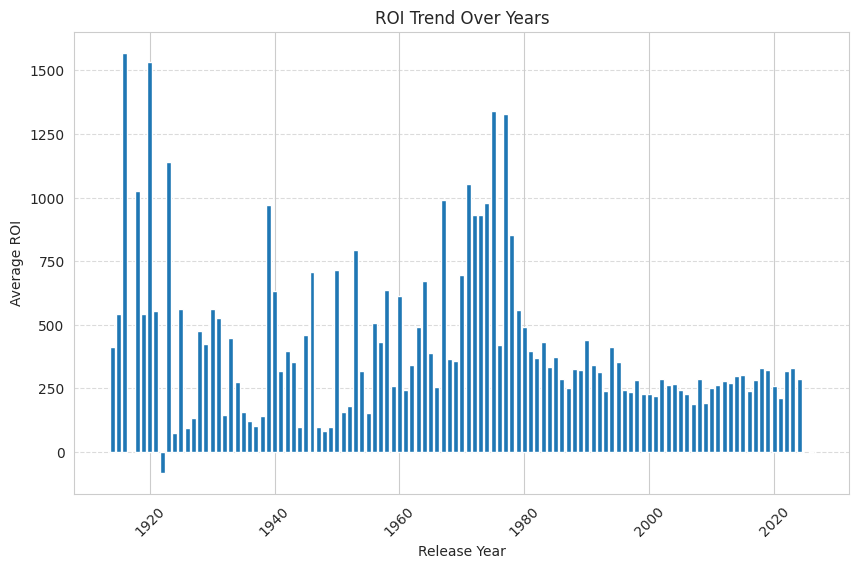

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_df is your DataFrame with the 'release_date' and 'ROI' columns

# Convert 'release_date' to datetime format
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

# Extract year from 'release_date'
filtered_df['release_year'] = filtered_df['release_date'].dt.year

# Group by year and calculate average ROI
roi_by_year = filtered_df.groupby('release_year')['ROI'].mean()

# Plot the ROI trend using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roi_by_year.index, roi_by_year.values)
plt.title('ROI Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average ROI')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##**C) Distribution of the average ROI per month**

In [ ]:
# Convert 'release_date' to datetime format
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])

# Extract month from 'release_date'
filtered_df['release_month'] = filtered_df['release_date'].dt.month

# Group by month and calculate average ROI
roi_by_month = filtered_df.groupby('release_month')['ROI'].mean()

# Find the month with the highest average ROI
best_month = roi_by_month.idxmax()

# Get the corresponding ROI value for the best month
best_month_roi = roi_by_month.max()

print(f"The best ROI was in month {best_month} with an average ROI of {best_month_roi:.2f}")

The best ROI was in month 7 with an average ROI of 431.09


<ipython-input-76-cc35897a90e7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-cc35897a90e7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create the bar graph trace
bar_graph = go.Bar(
    x=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    y=roi_by_month.values,  # Use ROI values as the y values
    marker=dict(color='skyblue'),  # Set the color of bars
)

# Create layout for the plot
layout = go.Layout(
    title='Average ROI by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Average ROI'),
    template='plotly_white'
)

# Create a figure
fig = go.Figure(data=[bar_graph], layout=layout)

# Show the interactive plot
fig.show()


##**d) Languages which have the highest ROI (Movies > 50)**

Upon earlier analysis we came to the conclusion that a minimum threshold of the number of movies was required for analysis of the languages which gave the highest returns. This is because there were certain languages, which gave high returns, but had very few movies (< 5). Hence we cannot draw an accurate conclusion from them. So threshold has been set to 50.

In [ ]:
# Group by 'original_language' column and calculate average ROI for each language
language_stats = filtered_df.groupby('original_language').agg({'title': 'count', 'ROI': 'mean'})

# Filter languages with more than 50 movies
language_stats = language_stats[language_stats['title'] > 50]

# Select top 10 languages with the highest average ROI
top_10_languages = language_stats.nlargest(10, 'ROI')

print("Top 10 languages with the highest ROI and more than 50 movies:")
print(top_10_languages)

Top 10 languages with the highest ROI and more than 50 movies:
                   title    ROI
original_language              
Chinese              594 819.01
Persian              114 640.78
Japanese             451 609.67
Korean               248 587.15
Swedish               75 449.20
Flemish               65 364.42
Portuguese           160 363.91
Tamil                124 327.24
Hindi                397 312.76
Malayalam            136 310.88


In [ ]:
import plotly.graph_objects as go

# Group by 'original_language' column and calculate average ROI for each language
language_stats = filtered_df.groupby('original_language').agg({'title': 'count', 'ROI': 'mean'})

# Filter languages with more than 50 movies
language_stats = language_stats[language_stats['title'] > 50]

# Select top 10 languages with the highest average ROI
top_10_languages = language_stats.nlargest(10, 'ROI')

# Create a bar chart trace
bar_trace = go.Bar(
    x=top_10_languages.index,
    y=top_10_languages['ROI'],
    marker_color='skyblue',
    text=top_10_languages['ROI'].round(2),
    textposition='auto',
    name='Average ROI'
)

# Create layout
layout = go.Layout(
    title='Top 10 Languages with Highest ROI (Movies > 50)',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Average ROI'),
    template='plotly_white'
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show interactive plot
fig.show()


# **4. ANALYSIS OF MARKET SHARE**

##**a) top 10 market share for language**

In [ ]:
total_revenue = filtered_df['revenue'].sum()

# Calculate market share by language
language_market_share = filtered_df.groupby('original_language')['revenue'].sum() / total_revenue
language_market_share = language_market_share.sort_values(ascending=False).head(10)

print("Top 10 Languages by Market Share:")
print(language_market_share)

Top 10 Languages by Market Share:
original_language
English    0.91
Chinese    0.03
Japanese   0.01
French     0.01
Hindi      0.01
Korean     0.01
Spanish    0.00
Russian    0.00
German     0.00
Italian    0.00
Name: revenue, dtype: float64


##**b) top 10 market share for production country**

In [ ]:
# Replace NaN values in 'production_countries'
movies_df['production_countries'] = movies_df['production_countries'].fillna('')


# Create a DataFrame to contain rows with multiple production countries
multiple_countries_df = movies_df[movies_df['production_countries'].apply(lambda x: len(str(x).split(',')) > 1)]

# Count the occurrences of each unique combination of production countries
multiple_countries_counts = multiple_countries_df['production_countries'].value_counts()

# Display the unique combinations and their counts
print("Unique combinations of production countries and their counts:")
print(multiple_countries_counts)

Unique combinations of production countries and their counts:
production_countries
Canada, United States of America              1953
United Kingdom, United States of America      1424
France, Italy                                 1160
Belgium, France                                741
East Germany, Germany                          612
                                              ... 
United Kingdom, Canada, Switzerland              1
France, Germany, United Kingdom, Georgia         1
Egypt, France, Qatar, United Arab Emirates       1
Croatia, France, Hungary, Serbia, Slovenia       1
Finland, France, Netherlands                     1
Name: count, Length: 8568, dtype: int64


In [ ]:
# Create a copy of the DataFrame
encoded_movies_df = movies_df.copy()

# Replace NaN values in 'production_countries'
encoded_movies_df['production_countries'] = encoded_movies_df['production_countries'].fillna('')

# Convert production countries into lists for each movie
production_countries_data = encoded_movies_df['production_countries'].apply(lambda x: [] if pd.isna(x) else [country.strip() for country in x.split(",")])

# Extract unique production countries
unique_countries = sorted(list(set([country for sublist in production_countries_data for country in sublist])))

# Add encoding columns
for country in unique_countries:
    encoded_movies_df[country] = production_countries_data.apply(lambda x: x.count(country) / len(x) if country in x else 0.0)

print("New DataFrame with Production Country Encoding:")
print(encoded_movies_df)

In [ ]:
total_revenue = encoded_movies_df['revenue'].sum()

# Create a DataFrame
revenue_by_country = pd.DataFrame()

# Iterate over each production country column
for country in unique_countries:
    revenue_by_country.loc[country, 'Total Revenue'] = (encoded_movies_df[country] * encoded_movies_df['revenue']).sum()

# Calculate market share for each production country
revenue_by_country['Market Share'] = (revenue_by_country['Total Revenue'] / total_revenue)*100

# Sort production countries
top_countries_by_market_share = revenue_by_country.sort_values(by='Market Share', ascending=False).head(10)

# Display the top 10 production countries
print("Top 10 Production Countries by Market Share:")
print(top_countries_by_market_share)

In [ ]:
plt.figure(figsize=(10, 8))
language_market_share.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 languages by Market Share')
plt.xlabel('Market Share (%)')
plt.ylabel('Language')
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=language_market_share.sort_values(),
    y=language_market_share.sort_values().index,
    orientation='h',
    marker=dict(color='skyblue')
))

fig.update_layout(
    title='Top 10 languages by Market Share',
    xaxis=dict(title='Market Share (%)'),
    yaxis=dict(title='Language'),
    height=600,
    width=800
)

fig.show()


In [ ]:

plt.figure(figsize=(12, 8))
top_countries_by_market_share['Market Share'].plot(kind='bar', color='purple')
plt.xlabel('Production Country')
plt.ylabel('Market Share (%)')
plt.title('Top 10 Production Countries by Market Share')
plt.xticks(rotation=45)
plt.show()

# **5. Analysis of budget and revenue using machine learning algorithms**

Developed a linear regression model to predict movie revenues based on budget. The model highlighted the strong influence of budget on revenue outcomes.

Utilized a Random Forest model to capture non-linear dependencies, which provided a more nuanced understanding of the factors affecting movie revenue and improved prediction accuracy.

## Scatter plot betweem "Revenue" and "Budget"

In [ ]:
movies_df[['revenue', 'budget']].describe()


df_cleaned = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]


plt.scatter(df_cleaned['budget'], df_cleaned['revenue'])
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


correlation = df_cleaned['revenue'].corr(df_cleaned['budget'])
print(f'The correlation between revenue and budget is: {correlation}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(movies_df['budget'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(movies_df['revenue'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.show()

## Log transformed relation between "Revenue and "Budget"

In [ ]:
import numpy as np

movies_df['log_budget'] = np.log1p(movies_df['budget'])
movies_df['log_revenue'] = np.log1p(movies_df['revenue'])

plt.figure(figsize=(10, 6))
plt.scatter(movies_df['log_budget'], movies_df['log_revenue'], alpha=0.5)
plt.title('Log of Revenue vs Log of Budget')
plt.xlabel('Log of Budget')
plt.ylabel('Log of Revenue')
plt.show()

correlation = movies_df['log_revenue'].corr(movies_df['log_budget'])
print(f"The correlation between log of revenue and log of budget is: {correlation}")


In [ ]:
df_clean = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]


df_clean['genres'] = df_clean['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
genre_revenue = df_clean.groupby('genres')['revenue'].mean().sort_values(ascending=False)
print(genre_revenue)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_clean[['budget']]  # predictor
y = df_clean['revenue']   # response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Model score: {model.score(X_test, y_test)}')

In [ ]:
assert df_clean.isnull().sum().sum() == 0, "Missing values present in the cleaned dataframe"
assert len(df_clean) > 100, "Unexpectedly low number of rows in the cleaned dataframe"


In [ ]:
movies_df.drop_duplicates(inplace=True)

movies_df.dropna(subset=['revenue', 'budget'], inplace=True)

movies_df = movies_df[(movies_df['revenue'] > 0) & (movies_df['budget'] > 0)]

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

movies_df.reset_index(drop=True, inplace=True)

In [ ]:
print(movies_df['status'].unique())

In [ ]:
movies_df['ROI'] = movies_df['revenue'] / movies_df['budget']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



movies_df = movies_df[(movies_df['revenue'] > 0) & (movies_df['budget'] > 0)]
for col in ['revenue', 'budget']:
    percentiles = movies_df[col].quantile([0.01, 0.99]).values
    movies_df = movies_df[(movies_df[col] >= percentiles[0]) & (movies_df[col] <= percentiles[1])]

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
movies_df['budget'].plot(kind='box')
plt.title('Box Plot of Budget')

plt.subplot(1, 2, 2)
movies_df['revenue'].plot(kind='box')
plt.title('Box Plot of Revenue')
plt.show()

movies_df['main_genre'] = movies_df['genres'].str.split(',').str[0]
movies_df.boxplot(column='revenue', by='main_genre', rot=90, figsize=(12, 6))
plt.title('Box Plot of Revenue by Movie Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.show()

movies_df['log_revenue'] = np.log1p(movies_df['revenue'])
movies_df['log_budget'] = np.log1p(movies_df['budget'])

plt.scatter(movies_df['vote_average'], movies_df['log_revenue'])
plt.title('Revenue vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Log Revenue')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['budget'], bins=30, kde=False, color='skyblue')
plt.title('Budget Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['revenue'], bins=30, kde=False, color='green')
plt.title('Revenue Distribution')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_cleaned)
plt.title('Budget vs Revenue')
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='genres', y='revenue', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Revenue by Movie Genre')
plt.show()

In [ ]:
df_cleaned['year'] = pd.to_datetime(df_cleaned['release_date']).dt.year
revenue_by_year = df_cleaned.groupby('year')['revenue'].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=revenue_by_year.index, y=revenue_by_year.values)
plt.title('Total Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='vote_average', y='revenue', data=df_cleaned, scatter_kws={'alpha':0.3})
plt.title('Revenue vs Vote Average')
plt.show()

In [ ]:
correlation_matrix = df_cleaned[['budget', 'revenue', 'vote_average', 'popularity']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Analysis')
plt.show()

In [ ]:
import pandas as pd


movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['year'] = movies_df['release_date'].dt.year

movies_per_year = movies_df.groupby('year').size()
total_revenue_per_year = movies_df.groupby('year')['revenue'].sum()

movies_after_2000 = movies_df[movies_df['year'] > 2000]

print(movies_per_year)
print(total_revenue_per_year)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

imputer = SimpleImputer(strategy='mean')

pipeline = make_pipeline(imputer, LinearRegression())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


decision_tree_model = DecisionTreeRegressor(random_state=42)


decision_tree_model.fit(X_train, y_train)


y_pred = decision_tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Decision Tree model MSE: {mse}')
print(f'Decision Tree model R^2: {r2}')


from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree_model, filled=True)
plt.show()

In [ ]:
df_copy = movies_df.copy()

df_copy['adult'] = df_copy['adult'].astype(int)

feature_columns = ['budget', 'popularity', 'adult']

X = df_copy[feature_columns]
y = df_copy['revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest model MSE: {mse_rf}')
print(f'Random Forest model R^2: {r2_rf}')

feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns
importance_frame = pd.DataFrame({'Importance': feature_importances, 'Feature': feature_names}).sort_values(by='Importance', ascending=False)

print(importance_frame)

# **6. Pytest**

In [ ]:
import pytest

In [ ]:

def test_csv_import(dataframe):
    # Test importing a CSV file
    try:
      assert len(dataframe) > 0
      return 'successful load dataset into df'
    except AssertionError:
      print('csv_file is not correctly loaded into df')
ddf = pd.DataFrame()
test_csv_import(ddf)

def test_remove_duplicates(dataframe):
  # Test whether there is duplicate rows in dataframe
  duplicate = dataframe[dataframe.duplicated()]
  try:
    assert len(duplicate) == 0
    return 'no duplicate rows exist'
  except AssertionError:
    print('dataframe still has duplicate rows')

test_remove_duplicates(ddf)

def check_for_null_values(dataframe):
  # Test whether there is null value in dataframe
  try:
        assert not dataframe.isnull().values.any()
        return 'No null values inside the DataFrame'
  except AssertionError:
        print('DataFrame still has null values')

check_for_null_values(ddf)

